In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import integrate
from IPython import display
%matplotlib inline

In [11]:
data = np.random.randint(1,10, size=10)
x = tf.constant(data, name='x')
y = tf.Variable(x**2, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

[81 25 49 81 49 81  4  4  1 81]


In [20]:
x = tf.Variable(0, name='x')
y = tf.Variable(0, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    for i in range(5):
        session.run(model)
        x += 1
        y = x**2
        print(session.run(y))

1
4
9
16
25


In [10]:
n = tf.Variable(0, name='n')
a = tf.Variable(0, name='a')
t = tf.Variable(0, name='t')

model = tf.global_variables_initializer()

with tf.Session() as sess:
    for i in range(5):
        n += 1
        r = np.random.randint(1000)
        t = t+r
        a = t/n
        sess.run(model)
        print(sess.run(a))

341
545
681
606
499


In [16]:
x = tf.constant(35, name='x')
print(x)
y = tf.Variable(x + 5, name='y')

with tf.Session() as sess:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/tmp/basic", sess.graph)
    model =  tf.global_variables_initializer()
    sess.run(model)
    print(sess.run(y))

Tensor("x_2:0", shape=(), dtype=int32)
40


In [3]:
x = tf.placeholder("float", 3)
y = x ** 2

with tf.Session() as sess:
    result = sess.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 1.  4.  9.]


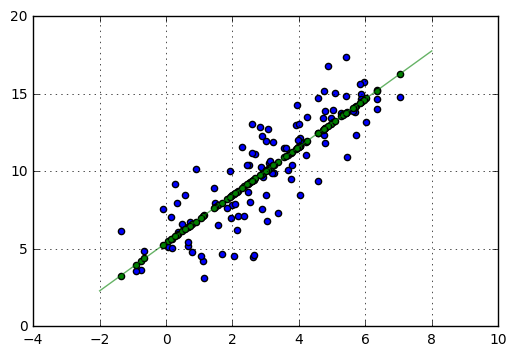

[[ 5.39077997]
 [ 1.54807591]]


In [15]:
import tensorflow as tf         
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

num_examples = 100    #100 points
X = np.array([np.linspace(0, 6, num_examples), np.linspace(4, 16, num_examples)]) #array with 0-6 and 0-12
X += np.random.randn(2, num_examples) #add random numbers, 2 dimensions to X
x, y = X                              #split X into x and y
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32) #array of [1., a] 2 by 100, the 1 is multiplied by the c weight

losses = []
training_steps = 5000
learning_rate = 0.001 #rate fo learning

with tf.Session() as sess:
    input = tf.constant(x_with_bias)
    target = tf.constant(np.transpose([y]).astype(np.float32)) #y but instead of 50 by 1, its 1 by 50
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1)) #random weights value, 2 by 1, mean 0, standard deviation 0.1

    tf.global_variables_initializer().run()

    yhat = tf.matmul(input, weights) #multiply x_with_bias by the weights
    yerror = tf.sub(yhat, target) #error is the target - yhat
    loss = tf.nn.l2_loss(yerror) #the error is squared and halved to punish bigger mistakes more
  
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
    for _ in range(training_steps): #100 steps
        update_weights.run() #run update wieghts
        losses.append(loss.eval()) #append to losses with the loss (the l2 error)

    betas = weights.eval() #betas is the weights
    yhat = yhat.eval()

plt.scatter(x, y) #plot points
plt.scatter(x, np.transpose(yhat)[0], c="g") #plot points with weights applied
line_x_range = (-2, 8)
plt.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6) #draw line with weights from -2 to 8
plt.grid(True)
plt.show()
print betas

In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/temp/data/", one_hot=True)
%matplotlib inline

learning_rate = 0.01
training_iteration = 30
batch_size = 100
display_step = 2

x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

with tf.name_scope("Wx_b") as scope:
    model = tf.nn.softmax(tf.matmul(x, W) + b)
    
w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("biases", b)

with tf.name_scope("cost_function") as scope:
    cost_function = -tf.reduce_sum(y*tf.log(model))
    
    tf.summary.scalar("cost_function", cost_function)
    
with tf.name_scope("train") as scope:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
    
init = tf.global_variables_initializer()

merged_summary_op = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)
    
    summary_writer = tf.summary.FileWriter('/home/logdir', graph=sess.graph)
    
    for iteration in range(training_iteration):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += sess.run(cost_function, feed_dict={x: batch_xs, y: batch_ys})/total_batch
            
            #summary_str = sess.run(merged_summary_op, feed_dict={x: batch_xs, y: batch_ys})
            #summary_writer.add_summary(summary_str, iteration*total_batch + 1)
            
        if iteration % display_step == 0:
            print "Iteration:", '%04d' % (iteration + 1), 'cost=', "{:.9f}".format(avg_cost)
            
    print "tuning complete"
    
    predictions = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(predictions, "float"))
    print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})


Extracting /temp/data/train-images-idx3-ubyte.gz
Extracting /temp/data/train-labels-idx1-ubyte.gz
Extracting /temp/data/t10k-images-idx3-ubyte.gz
Extracting /temp/data/t10k-labels-idx1-ubyte.gz
Iteration: 0001 cost= 29.860465115
Iteration: 0003 cost= 20.986357887
Iteration: 0005 cost= 20.249457015
Iteration: 0007 cost= 19.653779720
Iteration: 0009 cost= 19.366848830
Iteration: 0011 cost= 19.173188326
Iteration: 0013 cost= 18.855155920
Iteration: 0015 cost= 18.810067159
Iteration: 0017 cost= 18.602112344
Iteration: 0019 cost= 18.547303598
Iteration: 0021 cost= 18.448906765
Iteration: 0023 cost= 18.329639615
Iteration: 0025 cost= 18.223240460
Iteration: 0027 cost= 18.212469102
Iteration: 0029 cost= 18.133737981
tuning complete
Accuracy: 0.9218


In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/temp/data/", one_hot=True)
%matplotlib inline

learning_rate = 0.01
training_iteration = 30
batch_size = 100
display_step = 2

x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

with tf.name_scope("Wx_b") as scope:
    model = tf.nn.softmax(tf.matmul(x, W) + b)
    
w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("biases", b)


cost_function = -tf.reduce_sum(y*tf.log(model))
    
tf.summary.scalar("cost_function", cost_function)
    

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
    
init = tf.global_variables_initializer()

merged_summary_op = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(training_iteration):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += sess.run(cost_function, feed_dict={x: batch_xs, y: batch_ys})/total_batch
            
        if iteration % display_step == 0:
            print "Iteration:", '%04d' % (iteration + 1), 'cost=', "{:.9f}".format(avg_cost)
            
    print "tuning complete"
    
    predictions = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(predictions, "float"))
    print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})


Extracting /temp/data/train-images-idx3-ubyte.gz
Extracting /temp/data/train-labels-idx1-ubyte.gz
Extracting /temp/data/t10k-images-idx3-ubyte.gz
Extracting /temp/data/t10k-labels-idx1-ubyte.gz
Iteration: 0001 cost= 29.860465115
Iteration: 0003 cost= 21.066546144
Iteration: 0005 cost= 20.069845579
Iteration: 0007 cost= 19.660262473
Iteration: 0009 cost= 19.345162941
Iteration: 0011 cost= 19.125064370
Iteration: 0013 cost= 18.878493691
Iteration: 0015 cost= 18.668790548
Iteration: 0017 cost= 18.717317753
Iteration: 0019 cost= 18.488762749
Iteration: 0021 cost= 18.354010411
Iteration: 0023 cost= 18.323504581
Iteration: 0025 cost= 18.235226945
Iteration: 0027 cost= 18.227519084
Iteration: 0029 cost= 18.089459886
tuning complete
Accuracy: 0.9228
